In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [2]:
X,y = make_moons(n_samples=100,noise=0.2)

In [3]:
X.shape

(100, 2)

In [4]:
y.shape

(100,)

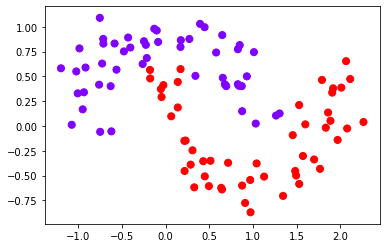

In [5]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
ax = plt.gca()

In [6]:
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [7]:
step_num = 50
axis_x = np.linspace(xlim[0],xlim[1],step_num)
axis_y = np.linspace(ylim[0],xlim[1],step_num)
axis_x,axis_y = np.meshgrid(axis_x,axis_y)

In [8]:
axis_x.shape

(50, 50)

In [9]:
xy = np.vstack([axis_x.ravel(),axis_y.ravel()]).T

In [10]:
xy.shape

(2500, 2)

In [11]:
#plt.scatter(xy[:,0],xy[:,1])

In [12]:
from sklearn.svm import SVC

In [13]:
svc = SVC()
svc.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
z = svc.decision_function(xy)

In [15]:
z.shape

(2500,)

In [16]:
z = z.reshape(axis_x.shape)

In [17]:
z.shape

(50, 50)

In [18]:
z_pcolor = np.where(z<0,-1,1)

In [19]:
axis_x.shape

(50, 50)

In [20]:
axis_y.shape

(50, 50)

(-0.9850698260427169, 1.2046478968825907)

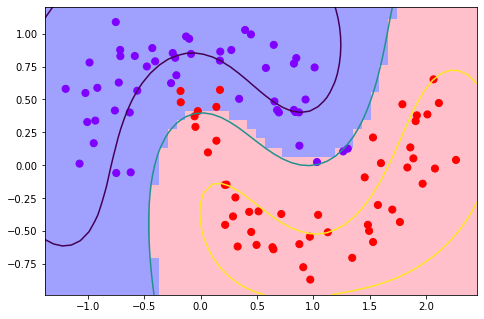

In [21]:
#plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
#ax = plt.gca()
#---上面这两个语句必须要再运行一遍，否则下面绘制不了图形
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
color_light = mpl.colors.ListedColormap(['#A0A0FF', 'pink'])
ax.contour(axis_x,axis_y,z,levels=[-1,0,1])
ax.pcolormesh(axis_x,axis_y,z_pcolor,cmap=color_light)
ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
ax.set_xlim(xlim)
ax.set_ylim(ylim)

探索不同核函数的效果

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from time import time
from datetime import datetime

In [23]:
cancer = load_breast_cancer()

In [24]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [25]:
cancer.data.shape

(569, 30)

In [26]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [27]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [28]:
np.unique(cancer.target)

array([0, 1])

In [29]:
Xtrain, Xtest, ytrain, ytest = train_test_split(cancer.data, cancer.target, test_size = 0.3, random_state=29)

多项式kernel跑不出来结果

In [30]:
# kernels = ['linear', 'rbf', 'sigmoid', 'poly']
kernels = ['linear', 'rbf', 'sigmoid']
for kernel in kernels:
    time0 = time()
    svc = SVC(kernel = kernel, gamma = 'auto').fit(Xtrain,ytrain)
    accuracy = svc.score(Xtest,ytest)
    print("The Accuracy under kernel {} is {}".format(kernel, accuracy))
    print(datetime.fromtimestamp(time() - time0).strftime("%M:%S:%f"))

The Accuracy under kernel linear is 0.9532163742690059
00:00:942194
The Accuracy under kernel rbf is 0.6081871345029239
00:00:014803
The Accuracy under kernel sigmoid is 0.6081871345029239
00:00:008163


检查数据集的量纲

In [31]:
data = pd.DataFrame(cancer.data, columns = cancer.feature_names)

In [32]:
data.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,max
mean radius,569.0,14.127292,3.524049,6.981000,8.458360,9.529200,10.260000,11.700000,13.370000,15.780000,19.530000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,10.930400,13.088000,14.078000,16.170000,18.840000,21.800000,24.992000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,53.827600,60.496000,65.830000,75.170000,86.240000,104.100000,129.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,215.664000,275.780000,321.600000,420.300000,551.100000,782.700000,1177.400000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.068654,0.075042,0.079654,0.086370,0.095870,0.105300,0.114820,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.033351,0.040660,0.049700,0.064920,0.092630,0.130400,0.175460,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.000000,0.004983,0.013686,0.029560,0.061540,0.130700,0.203040,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.000000,0.005621,0.011158,0.020310,0.033500,0.074000,0.100420,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.129508,0.141500,0.149580,0.161900,0.179200,0.195700,0.214940,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.051504,0.053926,0.055338,0.057700,0.061540,0.066120,0.072266,0.09744


由上可以看出，不同的特征取值不同，量纲差异比较大

In [33]:
from sklearn.preprocessing import StandardScaler

# 这里先标准化，再分割测试集是有问题的
X = StandardScaler().fit_transform(cancer.data)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, cancer.target, test_size = 0.3, random_state=29)

In [34]:
X.shape

(569, 30)

量纲统一之后，包括多项式核也能跑出来结果了；
并且所有核函数的结果都得到了提高

In [35]:
kernels = ['linear', 'rbf', 'sigmoid', 'poly']
# kernels = ['linear', 'rbf', 'sigmoid']
for kernel in kernels:
    time0 = time()
    svc = SVC(kernel = kernel, gamma = 'auto').fit(Xtrain,ytrain)
    accuracy = svc.score(Xtest,ytest)
    print("The Accuracy under kernel {} is {}".format(kernel, accuracy))
    print(datetime.fromtimestamp(time() - time0).strftime("%M:%S:%f"))

The Accuracy under kernel linear is 0.9883040935672515
00:00:003865
The Accuracy under kernel rbf is 0.9824561403508771
00:00:004460
The Accuracy under kernel sigmoid is 0.9649122807017544
00:00:003671
The Accuracy under kernel poly is 0.8947368421052632
00:00:004167


RBF核函数的调参

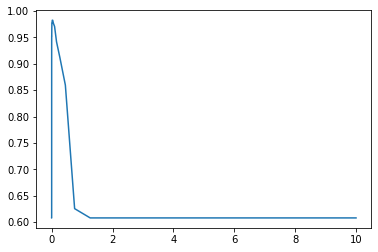

In [36]:
score = []
gamma_range = np.logspace(-10,1,50)
for gamma in gamma_range:
    svc = SVC(kernel='rbf',gamma=gamma)
    svc.fit(Xtrain, ytrain )
    score.append(svc.score(Xtest,ytest))
    
plt.plot(gamma_range, score)

In [37]:
print(max(score), gamma_range[score.index(max(score))])

0.9824561403508771 0.020235896477251554


不平衡类的处理

In [38]:
from sklearn.datasets import make_blobs

class_1 = 500 #类别1有500个样本 
class_2 = 50 #类别2只有50个 
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心 
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散 
X, y = make_blobs(n_samples=[class_1, class_2],centers=centers, cluster_std=clusters_std, random_state=0, shuffle=False)

In [39]:
X.shape

(550, 2)

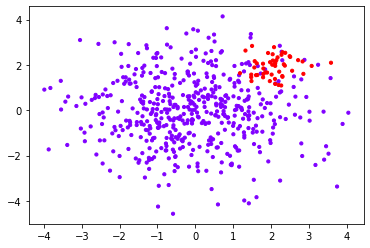

In [41]:
 plt.scatter(X[:,0],X[:,1], c=y, cmap='rainbow',s=10)

In [42]:
svc = SVC(kernel='linear', C=1)
svc.fit(X,y)
svc.score(X,y)

0.9418181818181818

In [43]:
svc_w = SVC(kernel='linear', C=1, class_weight={1:10})
svc_w.fit(X,y)
svc_w.score(X,y)

0.9127272727272727

绘制两种情况下的决策边界

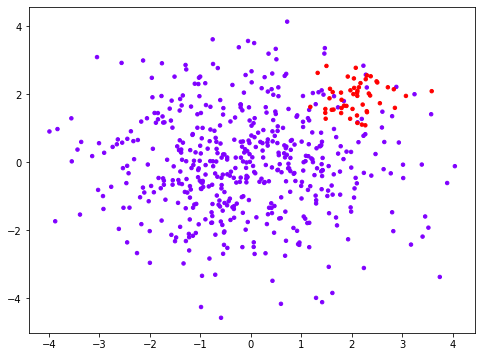

In [76]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X[:,0],X[:,1], c=y, cmap='rainbow',s=12)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
XX, YY = np.meshgrid(xx,yy)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

In [77]:
xy.shape

(900, 2)

In [78]:
Z_svc = svc.decision_function(xy)

In [79]:
Z_svc.shape

(900,)

In [80]:
Z_svc = svc.decision_function(xy).reshape(XX.shape)

In [81]:
Z_svc.shape

(30, 30)

In [82]:
Z_svc_w = svc_w.decision_function(xy).reshape(XX.shape)

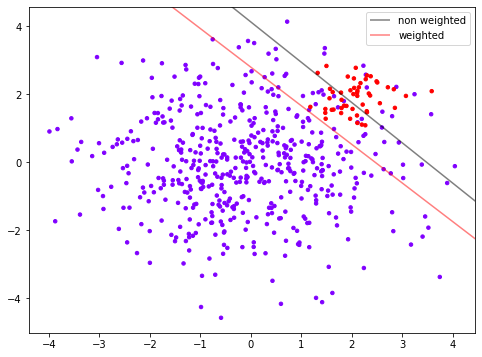

In [83]:
a = ax.contour(XX, YY, Z_svc, colors='black', levels=[0], linestyles=['-'], alpha=0.5)
b = ax.contour(XX, YY, Z_svc_w, colors='red', levels=[0], linestyles=['-'], alpha=0.5)
ax.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"])
fig

二分类的评估指标

混淆矩阵

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [97]:
svc_prob = SVC(kernel='linear', C=1, probability=True)
svc_prob.fit(X,y)
svc_prob.predict_proba(X)

array([[0.68172917, 0.31827083],
       [0.27038549, 0.72961451],
       [0.95874354, 0.04125646],
       ...,
       [0.16354981, 0.83645019],
       [0.35843778, 0.64156222],
       [0.32205679, 0.67794321]])

In [98]:
svc_prob.classes_

array([0, 1])

In [94]:
fpr, recall, thresholds = roc_curve(y, svc_prob.predict_proba(X)[:,1], pos_label=1)

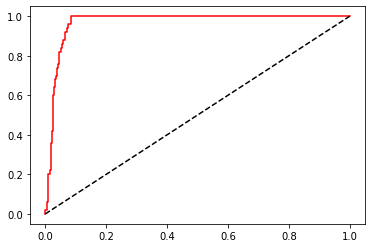

In [95]:
fig, ax = plt.subplots()
ax.plot(fpr, recall, color='red')
ax.plot([0, 1], [0, 1], color='black', linestyle='--')